In [5]:
# as i am training on the_great_gatsby by 'Francis Scott Key Fitzgerald', this model will predict on basically 'Fitzgeraldian tone';
# this would predict word, as predicting sentenses means basically NLP, by tokenizing individual words not letters;

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [2]:
# load text by opening the file
filename = r"D:\Deep Learning\Text Prediction Using LSTM\English Text\the_great_gatsby.txt"

raw_text = open(filename, 'r', encoding = 'utf8').read() # contains both uppercase + lowercase alphabets, nothing wrong with this but the vocabulary gonna be very big ---> needs lots of training, to make meaningful senetences, so make everything as lowercase letters;
raw_text = raw_text.lower() # converting into lowercase letters;

print(raw_text[0 : 1000]) # printing 1st 1000 characters;

                                  i

in my younger and more vulnerable years my father gave me some advice
that i’ve been turning over in my mind ever since.

“whenever you feel like criticizing anyone,” he told me, “just
remember that all the people in this world haven’t had the advantages
that you’ve had.”

he didn’t say any more, but we’ve always been unusually communicative
in a reserved way, and i understood that he meant a great deal more
than that. in consequence, i’m inclined to reserve all judgements, a
habit that has opened up many curious natures to me and also made me
the victim of not a few veteran bores. the abnormal mind is quick to
detect and attach itself to this quality when it appears in a normal
person, and so it came about that in college i was unjustly accused of
being a politician, because i was privy to the secret griefs of wild,
unknown men. most of the confidences were unsought—frequently i have
feigned sleep, preoccupation, or a hostile levity when i realized

In [3]:
# now cleaning the text, by removing the numbers;
raw_text = "".join(c for c in raw_text if not c.isdigit())

In [4]:
# total characters do i have in the training text : list of unique every character, as set used;
chars = sorted(list(set(raw_text))) # including all special cahracters + space + alphabets; u may drop al of these without the alphabets using many NLP Tools;

print(len(chars))

52


In [5]:
# as i am dealing with NN, this only understands the numbers, so i need to assign a unique no of every 'chars', by using the dictionary;
char_to_int = dict((c, i) for i, c in enumerate(chars)) # creating a dictionary of characters mapped to integer values;

# i also need the characters from the integers after the prediction, as we doesnot understands the numbers;
int_to_chars = dict((i, c) for i, c in enumerate(chars))

In [6]:
n_chars = len(raw_text)
n_vocab = len(chars)
print('corpus length(total #characters) : ', n_chars)
print('total vocabulary(unique characters) : ', n_vocab)

corpus length(total #characters) :  270108
total vocabulary(unique characters) :  52


In [7]:
seq_length = 60 
step = 10 # from [0 to 9(total 10 tuples) --> input], 10th --> output;

sentences = [] # x values
next_chars = [] # y values, the character that follows the sentence defined as X;

for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

Number of sequences: 27005


In [17]:
# sentences

In [18]:
# x --> sequence / sentence;
# y --> next value(character) that comes after the sentence;
# reshape input to be [samples, time steps --> sequence length, features --> numbers of characters in our vocab (n_vocab)];

# doing vectorization; this returns a vector for all sentences indicating the presence or ansences of a character;


x = np.zeros((len(sentences), seq_length, n_vocab), dtype=bool)
y = np.zeros((len(sentences), n_vocab), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape) 
# (27005 --> length of senetnces, 60 --> a single sequence length, 52 --> available unique letters)
# the vector value is either (false or true) as vectorization done;

print(y.shape)
# this is also true/false, means each one of 27005, i have 51 false and 1 true for that particular letter(ie. a), may be interpreted as one hot encoding;

print(y[0:10])

(27005, 60, 52)
(27005, 52)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
   True False False False False False False False False False False False
  False False False False]
 [False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False  True False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]
 [F

In [20]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(seq_length, n_vocab)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

model.add(Dense(64))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           92672     
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 52)                3380      
                                                                 
Total params: 182644 (713.45 KB)
Trainable params: 182644 (713.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(x, y,
          batch_size=128,
          epochs=10)

model.save('the_great_gatsby_10epochs.h5')

Epoch 1/10
211/211 [==============================] - 86s 353ms/step - loss: 3.0911
Epoch 2/10
211/211 [==============================] - 63s 299ms/step - loss: 3.0401
Epoch 3/10
211/211 [==============================] - 63s 297ms/step - loss: 3.0171
Epoch 4/10
211/211 [==============================] - 62s 295ms/step - loss: 2.8636
Epoch 5/10
211/211 [==============================] - 62s 293ms/step - loss: 2.7562
Epoch 6/10
211/211 [==============================] - 64s 303ms/step - loss: 2.6839
Epoch 7/10
211/211 [==============================] - 73s 345ms/step - loss: 2.6014
Epoch 8/10
211/211 [==============================] - 79s 374ms/step - loss: 2.5143
Epoch 9/10
211/211 [==============================] - 68s 324ms/step - loss: 2.4168
Epoch 10/10
211/211 [==============================] - 67s 316ms/step - loss: 2.3530


C:\python_arpan\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# for loading partially trained model
from keras.models import load_model
new_model = load_model(r"D:\Deep Learning\Text Prediction Using LSTM\English Text\the_great_gatsby_10epochs.h5", compile=False)
new_model.compile('adam', loss = 'categorical_crossentropy') # u need to compile the newly loaded model, othwerwise u would not be able to evaluate or train or predict;

# # seeing how your model is performing, in case u forgotten
# results2 = new_model2.evaluate(X_test2, y_test_cat, steps = 16)
# print("Validation loss & accuracy : ", results2)

In [28]:
history2 = new_model.fit(x, y,
          batch_size=128,
          epochs=50)

model.save('the_great_gatsby_10+50_epochs.hdf5')

Epoch 1/50
211/211 [==============================] - 69s 297ms/step - loss: 2.2992
Epoch 2/50
211/211 [==============================] - 62s 294ms/step - loss: 2.2432
Epoch 3/50
211/211 [==============================] - 62s 293ms/step - loss: 2.1897
Epoch 4/50
211/211 [==============================] - 62s 295ms/step - loss: 2.1407
Epoch 5/50
211/211 [==============================] - 63s 298ms/step - loss: 2.0929
Epoch 6/50
211/211 [==============================] - 64s 305ms/step - loss: 2.0476
Epoch 7/50
211/211 [==============================] - 71s 338ms/step - loss: 2.0088
Epoch 8/50
211/211 [==============================] - 75s 356ms/step - loss: 1.9625
Epoch 9/50
211/211 [==============================] - 71s 334ms/step - loss: 1.9191
Epoch 10/50
211/211 [==============================] - 68s 320ms/step - loss: 1.8744
Epoch 11/50
211/211 [==============================] - 66s 313ms/step - loss: 1.8354
Epoch 12/50
211/211 [==============================] - 63s 299ms/step - lo

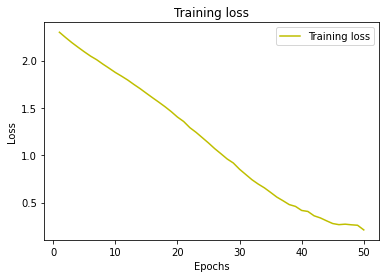

In [29]:
from matplotlib import pyplot as plt

loss = history2.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# now i will have 52 different probabilities each for the specific character, so i need to have the max probability for each character, for that gonna build a softmax like function;
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

In [47]:
# pick a random sentence from the text as seed;
start_index = random.randint(0, n_chars - seq_length - 1)

In [48]:
# initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

In [49]:
print('----- Seed for our text prediction: "' + sentence + '"')

----- Seed for our text prediction: "me, his face close to the window pane, nodding
into the twil"


In [50]:
generated

'me, his face close to the window pane, nodding\ninto the twil'

In [51]:
for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = new_model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_chars[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

e, and extait le the garkinc.

“i’r goinit gp mle onereo.”

he woommble, flom thou

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10636\3267894335.py:4: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds)


d nor elensuly five you leight jornang.

“doo’bt, thes becmowourd.”

“gasss? a noal down it—onqme, likhalder. “wangs spoped.

“wran, i eeparteded s.”

“thant, bage tom the ding, and todmant mr. g. he ayfalsstiklima
caissbues. a an aboul thit sproturd fint on the stong-goaw.”

sut the fon ussess, onlednable the room. 
